<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Загрузка данных

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [95]:
try:
    data = pd.read_csv('insurance.csv') # путь в локальной версии
except:
    data = pd.read_csv('/datasets/insurance.csv') # путь в сетевой версии

In [96]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [97]:
#data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


<AxesSubplot:>

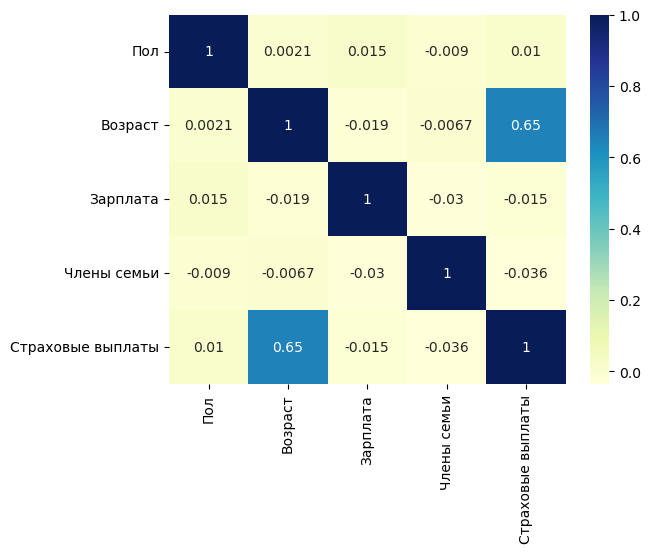

In [98]:
# проверим признаки на мультиколлинеарность
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Задание:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится

___
**Обоснование:**

**Шаг 1:** Умножим матрицу $X$ во всех выражениях на обратимую матрицу $P$ 

Формула обучения примет вид:
$$
w_2 = ((XP)^T XP)^{-1} (XP)^T y
$$

Предсказания примут вид: 
$$
a_2 = XPw_2 = XP ((XP)^T XP)^{-1} (XP)^T y
$$

In [99]:
#X = np.array([[1,2], [3,5], [13,3], [23,13]])
#P = np.array([[32,13], [14,13]])
#np.linalg.inv(P)
#print('(X @ P).T:  \n' , (X @ P).T)
#print('P.T @ X.T:  \n' , P.T @ X.T)
#print('X.T @ X:  \n' , X.T @ X)

---
**Шаг 1:**
$$
a_2 = XPw_2 = XP ((XP)^T XP)^{-1} (XP)^T y
$$

**Шаг 2:** Согласно свойству транспонированных матриц $(AB)^T=B^T A^T$ https://ru.wikipedia.org/wiki/Матрица_(математика)#Умножение_матриц
$$
XP ((XP)^T XP)^{-1} (XP)^T y = XP (P^T X^T XP)^{-1} P^T X^T y
$$


**Шаг 3:** Выражение $(P^T X^TX P)^{-1}$ содержит в скобках 3 квадратные матрицы $P^T$, $X^TX$, $P$. 
Можно применить следующий порядок преобразования $(ABС)^{-1} = ((AB)С)^{-1} = ((AB)С)^{-1} = С^{-1}(AB)^{-1} = С^{-1}B^{-1}A^{-1}$

$$
XP ((P^T) (X^TX) (P))^{-1}  P^T X^T  y = XP P^{-1} (X^TX)^{-1} (P^T)^{-1}  P^T X^T  y
$$

**Шаг 4:** Применим свойство единичных матриц $A^{-1} A = E$
$$
XP P^{-1} (X^TX)^{-1} (P^T)^{-1}  P^T X^T  y = X E (X^TX)^{-1} E X^T  y = X (X^TX)^{-1} X^T  y = Xw = a
$$


Тоесть умножение признаков на обратимую матрицу $P$ ведет к таким же результатам предсказаний, что и без умножения на $P$

---

## Алгоритм преобразования

**Алгоритм**

**Шаг 1:** Случайной генерацией создаем матрицу $P$ размерностью $n*n$, где $n$ - количество признаков. В нашем случае $n = 4$

**Шаг 2:** Проверяем, обратима ли созданная матрица. Если необоратима - возвращаемся к Шагу 1

**Шаг 3:** Проводим умножение матрицы с исходными данными $X$ на обратимую матрицу $P$, получаем преобразованную матрицу Z = X @ P

Полученную матрицу Z уже можно использовать для целей машинного обучения. Реальные значения исходных данных будут зашифрованы.

**Обоснование**

В рамках алгоритма мы гарантированно создаем обратимую матрицу P размерностью n, равное количеству признаков в матрице X.
Как ранее было доказано, преобразование матрицы признаков умножением X @ P в новую матрицу никак не влияет на результаты предсказаний линейной модели.

## Проверка алгоритма

In [100]:
# разделим данные на обучающие и целевые признаки
features_1 = data.drop(['Страховые выплаты'], axis=1) 
target = data['Страховые выплаты'] 

print(features_1.head())
print(features_1.shape)

   Пол  Возраст  Зарплата  Члены семьи
0    1     41.0   49600.0            1
1    0     46.0   38000.0            1
2    0     29.0   21000.0            0
3    0     21.0   41700.0            2
4    1     28.0   26100.0            0
(5000, 4)


In [101]:
# обучим модель на необработанных данных
model_1 = LinearRegression()
model_1.fit(features_1,target)

# получим предсказания о оценим метрику r2
predictions_1 = model_1.predict(features_1)
score_1 = r2_score(target, predictions_1)
print('Метрика r2 для модели линейной регрессии необработанной выборки :', score_1)

Метрика r2 для модели линейной регрессии необработанной выборки : 0.4249455028666802


In [102]:
np.random.seed(0) # устанавливаем генератор случайных чисел в исходное состояние

# обработаем данные согласно алгоритму
n = len(features_1.columns) # определим количество признаков n
encoder = []

while True:
    # шаг 1 - создадим обратимую матрицу encoder размерностью n*n 
    encoder = np.array(np.random.randint(20, size=(n,n)))
    try:
        # шаг 2 - проверка матрицы на обратимость
        np.linalg.inv(encoder) 
        break # ошибки нет - выходим из цикла
    except:
        pass # матрица encoder не имеет обратной -> ошибка -> не выходим из цикла

print('Создана обратимая матрица')
print(encoder)

Создана обратимая матрица
[[12 15  0  3]
 [ 3  7  9 19]
 [18  4  6 12]
 [ 1  6  7 14]]


In [103]:
# шаг 3 - создаим преобразованную матрицу с признаками путем перемножения матриц
features_2 = features_1 @ encoder

print(features_2.head())

          0         1         2         3
0  892936.0  198708.0  297976.0  595996.0
1  684139.0  152328.0  228421.0  456888.0
2  378087.0   84203.0  126261.0  252551.0
3  750665.0  166959.0  250403.0  500827.0
4  469896.0  104611.0  156852.0  313735.0


In [104]:
# обучим модель на преобразованных данных
model_2 = LinearRegression()
model_2.fit(features_2,target)

# получим предсказания о оценим метрику r2
predictions_2 = model_2.predict(features_2)
score_2 = r2_score(target, predictions_2)
print('Метрика r2 для модели линейной регрессии преобразованной выборки :', score_2)

Метрика r2 для модели линейной регрессии преобразованной выборки : 0.42494550286670074


---
**Вывод**

- Результат метрики r2 для необработанных данных  : 0.4249455028666801
- Результат метрики r2 для преобразованнх данных : 0.4249455028667024

Метрика идентична на 12ти знаках после запятой. Метод преобразования данных работает корректно. 

---
## Общий вывод

**Импорт и предобработка данных**
- Данныке испортированы без проблем
- В датасете нет пропусков, форматы данных по столбцам соответстуют содержанию
- Проверка на мультиколлинеарность показала отсутствие критических показателей корреляции между признаками, дополнительных действий не требует

**Алгоритм преобразования данных умножением на обратимую матрицу**
- Проведена математическая проверка утверждения, что умножение признаков на обратимую матрицу не приведет к изменению результатов предсказаний линейной регрессии
- Составлен алгоритм преобразования исходных данных
- Алгоритм был протестирован и сравнены результаты работы модели линейной регрессии для обработанных и необработанных данных
- Для сравнения примерена метрика r2
- Необработанные и необработанные данные дали одинаковый результат метрики

Вывод : Метод преобразования исходных данных умножением на обратимую матрицу не влияет на результаты предсказаний линейной регрессии
